In [25]:
from surprise import Dataset, Reader, accuracy
from surprise.model_selection import cross_validate, train_test_split
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise.prediction_algorithms.knns import KNNBasic
import matplotlib.pyplot as plt


file_path = 'ratings_small.csv'
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)
data = Dataset.load_from_file(file_path, reader=reader)


In [26]:
#Question 1
models = [
    SVD(),  # Probabilistic Matrix Factorization
    KNNBasic(sim_options={'user_based': True}),  # User-based Collaborative Filtering
    KNNBasic(sim_options={'user_based': False}),  # Item-based Collaborative Filtering
]

metrics = ['mae', 'rmse']
for model in models:
    print(f'\nModel: {model.__class__.__name__}')
    results = cross_validate(model, data, measures=metrics, cv=5, verbose=True)
    
    for metric in metrics:
        average_metric = sum(results[f'test_{metric}']) / 5
        print(f'Average {metric}: {average_metric}')


Model: SVD
Evaluating MAE, RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.6904  0.6912  0.6902  0.6934  0.6865  0.6904  0.0022  
RMSE (testset)    0.8978  0.8942  0.8973  0.9011  0.8919  0.8965  0.0031  
Fit time          1.99    1.81    1.66    1.90    1.79    1.83    0.11    
Test time         0.64    0.27    0.38    0.25    0.28    0.36    0.14    
Average mae: 0.6903578027001096
Average rmse: 0.8964543681529296

Model: KNNBasic
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fol

In [27]:
# Q2
results_dict = {'model_type': [], 'mae': [], 'rmse': []}
for model in models:
    if isinstance(model, SVD):
        model_type = 'PMF'
    elif(model.sim_options['user_based']):
        model_type = 'User'
    else: model_type = 'Item'
    print('\n'+model_type)
    
    results = cross_validate(model, data, measures=metrics, cv=5, verbose=True)
    
    for metric in metrics:
        average_metric = sum(results[f'test_{metric}']) / 5
        results_dict['model_type'].append(model_type)
        results_dict[metric].append(average_metric)
print('\n')
for key, values in results_dict.items():
    print(f"{key}: {values}")

print("\nComparison of Average Performances:")
model_types=['PMF','User','Item']

for metric in metrics:
    print(f"\nAverage {metric}:")
    for i in range(len(models)):
        model_type = results_dict['model_type'][2*i]
        metric_value = results_dict[metric][i]
        print(f"{model_type}: {metric_value}")
        

# Identify the best model based on RMSE and MAE
best_rmse_model = results_dict['model_type'][results_dict['rmse'].index(min(results_dict['rmse']))]
best_mae_model = results_dict['model_type'][results_dict['mae'].index(min(results_dict['mae']))]

print(f"\nBest model based on RMSE: {best_rmse_model}")
print(f"Best model based on MAE: {best_mae_model}")


PMF
Evaluating MAE, RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.6917  0.6925  0.6883  0.6920  0.6883  0.6906  0.0019  
RMSE (testset)    0.8963  0.9007  0.8943  0.9011  0.8920  0.8969  0.0036  
Fit time          1.65    1.71    1.72    2.05    1.95    1.82    0.15    
Test time         0.54    0.27    0.38    0.33    0.45    0.39    0.09    

User
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7441  0.7423  0.7416  0.7478  0.7433  0.7

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7649  0.7632  0.7715  0.7647  0.7727  0.7674  0.0039  
RMSE (testset)    0.9871  0.9896  1.0006  0.9878  1.0029  0.9936  0.0067  
Fit time          1.13    1.12    1.01    0.91    0.92    1.02    0.09    
Test time         3.70    3.36    2.78    3.41    3.35    3.32    0.30    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
D

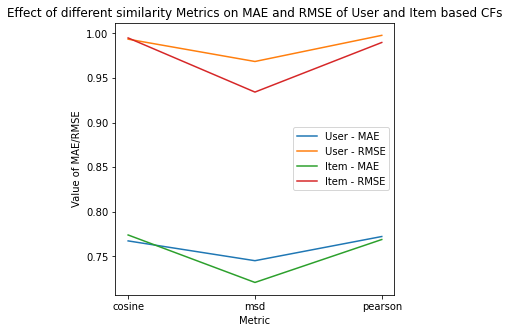

In [28]:
# Q3
similarity_metrics = ['cosine', 'msd', 'pearson']
models = ['user', 'item']

results_dict = {}

for model_type in models:
    results_dict[model_type] = {'mae': [], 'rmse': []}
    
    for sim_metric in similarity_metrics:
        model = KNNBasic(k=40, sim_options={'name': sim_metric, 'user_based': model_type == 'user'})
        results = cross_validate(model, data, measures=['mae', 'rmse'], cv=5, verbose=True)
        
        for metric in ['mae', 'rmse']:
            average_metric = sum(results[f'test_{metric}']) / 5
            results_dict[model_type][metric].append(average_metric)

# Plot the results
plt.figure(figsize=(5, 5))

for model_type in models:
    plt.plot(similarity_metrics, results_dict[model_type]['mae'], label=f'{model_type.capitalize()} - MAE')
    plt.plot(similarity_metrics, results_dict[model_type]['rmse'], label=f'{model_type.capitalize()} - RMSE')

plt.title('Effect of different similarity Metrics on MAE and RMSE of User and Item based CFs')
plt.xlabel('Metric')
plt.ylabel('Value of MAE/RMSE')
plt.legend()
plt.show()

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7493  0.7519  0.7476  0.7534  0.7458  0.7496  0.0028  
RMSE (testset)    0.9776  0.9803  0.9778  0.9868  0.9748  0.9794  0.0041  
Fit time          0.48    0.42    0.35    0.38    0.40    0.41    0.04    
Test time         2.12    1.70    1.96    1.73    1.82    1.86    0.16    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing s

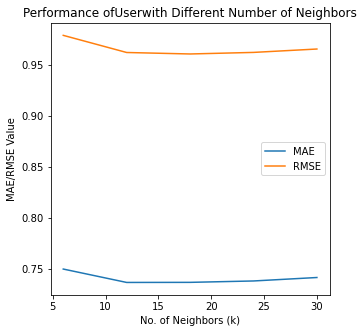

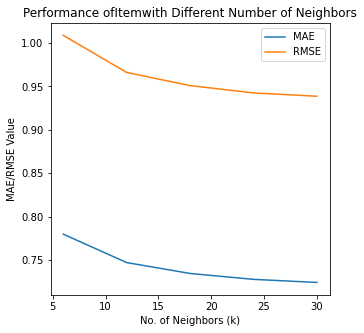

In [29]:
# Q4

neighbor_values = [6,12,18,24,30]
results_dict = {'user': {'mae': [], 'rmse': []}, 'item': {'mae': [], 'rmse': []}}

for model_type in ['user', 'item']:
    for k in neighbor_values:
        model = KNNBasic(k=k, sim_options={'user_based': model_type == 'user'})
        results = cross_validate(model, data, measures=['mae', 'rmse'], cv=5, verbose=True)
        for metric in metrics:
            average_metric = sum(results[f'test_{metric}']) / 5
            results_dict[model_type][metric].append(average_metric)

for model_type in ['user', 'item']:
    plt.figure(figsize=(5, 5))
    plt.plot(neighbor_values, results_dict[model_type]['mae'], label='MAE')
    plt.plot(neighbor_values, results_dict[model_type]['rmse'], label='RMSE')
    plt.title('Performance of'+ f'{model_type.capitalize()}' + 'with Different Number of Neighbors')
    plt.xlabel('No. of Neighbors (k)')
    plt.ylabel('MAE/RMSE Value')
    plt.legend()
    plt.show()

In [30]:
# Q5
best_k_user = neighbor_values[results_dict['user']['rmse'].index(min(results_dict['user']['rmse']))]
best_k_item = neighbor_values[results_dict['item']['rmse'].index(min(results_dict['item']['rmse']))]

print(results_dict)
print(f"\nBest number of neighbors (K) for User-based CF: {best_k_user}")
print(f"Best number of neighbors (K) for Item-based CF: {best_k_item}")


{'user': {'mae': [0.7496044977497477, 0.7364306333183366, 0.7365210065455159, 0.737882350132911, 0.7412880137390765], 'rmse': [0.9794462289433165, 0.9625880256501921, 0.9611362263229829, 0.962671836260454, 0.9660037418864599]}, 'item': {'mae': [0.7799375924497012, 0.7472270670346686, 0.7346954956043164, 0.7279294452044036, 0.724369262418324], 'rmse': [1.0086374569950562, 0.9659590163546905, 0.9508318875990899, 0.9424254440452616, 0.9385837760037086]}}

Best number of neighbors (K) for User-based CF: 18
Best number of neighbors (K) for Item-based CF: 30
